In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Assuming 'transactions' is the column containing transaction data
transactions = df['transactions']

# Calculate mean and standard deviation
mean = np.mean(transactions)
std_dev = np.std(transactions)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Fit the KNN model using 'timestamp' and 'store_nbr' as features
X = df[['timestamp', 'store_nbr']].values
k = 5  # You can adjust the number of neighbors as needed
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X)

# Take user inputs
new_date = pd.to_datetime(input("Enter the date (YYYY-MM-DD): "))
new_store_nbr = int(input("Enter the store number: "))
new_transaction_input = float(input("Enter the transaction amount: "))

# Convert user input date to timestamp
new_timestamp = new_date.timestamp()

# Find the k nearest neighbors to the new data point
new_data = np.array([[new_timestamp, new_store_nbr]])
distances, indices = knn_model.kneighbors(new_data)

# Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
new_transaction_alternative = np.mean(transactions.iloc[indices[0]])

# Calculate the range based on mean ± standard deviation of the alternative transaction value
min_range = new_transaction_alternative - std_dev
max_range = new_transaction_alternative + std_dev

# Check if the user input transaction value falls within the range
if min_range <= new_transaction_input <= max_range:
    # Append a new row to the DataFrame
    new_row = {'date': new_date, 'store_nbr': new_store_nbr, 'transactions': new_transaction_input}
    df = df.append(new_row, ignore_index=True)
    print("User input transaction appended successfully.")
else:
    print(f"Your input transaction amount ({new_transaction_input}) is outside the range "
          f"of normal amount range ({min_range} to {max_range}).")

# Optionally, you can save the updated DataFrame to a new CSV file
# df.to_csv('updated_transactions.csv', index=False)

print("Updated DataFrame:")
print(df)


Your input transaction amount (4444.0) is outside the range of normal amount range (188.31912551312314 to 2114.8808744868766).
Updated DataFrame:
            date  store_nbr  transactions     timestamp
0     2013-01-01         25           770  1.356998e+09
1     2013-01-02          1          2111  1.357085e+09
2     2013-01-02          2          2358  1.357085e+09
3     2013-01-02          3          3487  1.357085e+09
4     2013-01-02          4          1922  1.357085e+09
...          ...        ...           ...           ...
83483 2017-08-15         50          2804  1.502755e+09
83484 2017-08-15         51          1573  1.502755e+09
83485 2017-08-15         52          2255  1.502755e+09
83486 2017-08-15         53           932  1.502755e+09
83487 2017-08-15         54           802  1.502755e+09

[83488 rows x 4 columns]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Assuming 'transactions' is the column containing transaction data
transactions = df['transactions']

# Calculate mean and standard deviation
mean = np.mean(transactions)
std_dev = np.std(transactions)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Fit the KNN model using 'timestamp' and 'store_nbr' as features
X = df[['timestamp', 'store_nbr']].values
k = 5  # You can adjust the number of neighbors as needed
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X)

# Function to introduce error in a subset of data
def introduce_error(df, error_order,data_percentage):
    # Randomly select 10% of the data
    sample_size = int(len(df) * data_percentage/100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

# Introduce error in the DataFrame
df = introduce_error(df, error_order=100,data_percentage=10)

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Function to process a single row as input
def process_input(row):
    # Extract data from the row
    new_date = pd.to_datetime(row['date'])
    new_store_nbr = row['store_nbr']
    new_transaction_input = row['transactions']
    
    # Convert user input date to timestamp
    new_timestamp = new_date.timestamp()
    
    # Find the k nearest neighbors to the new data point
    new_data = np.array([[new_timestamp, new_store_nbr]])
    distances, indices = knn_model.kneighbors(new_data)
    
    # Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
    new_transaction_alternative = np.mean(transactions.iloc[indices[0]])
    
    # Calculate the range based on mean ± standard deviation of the alternative transaction value
    min_range = new_transaction_alternative - std_dev
    max_range = new_transaction_alternative + std_dev
    
    # Check if the user input transaction value falls within the range
    if min_range <= new_transaction_input <= max_range:
        # Add a new column to indicate if transaction is in range (1) or not (0)
        return 1
    else:
        return 0

# Apply processing on the second half and calculate accuracy, balanced accuracy, and F1 score
predicted_in_range = []
actual_error = []

for index, row in second_half.iterrows():
    predicted_in_range.append(process_input(row))
    actual_error.append(row['error'])

# Calculate accuracy
accuracy = accuracy_score(actual_error, predicted_in_range)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)

# Calculate F1 score
f1 = f1_score(actual_error, predicted_in_range)

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)


In [30]:
# Define counters
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Read the CSV file
df = pd.read_csv('transactions.csv')
# Function to introduce error in a subset of data
def introduce_error(df, error_order,data_percentage):
    # Randomly select 10% of the data
    sample_size = int(len(df) * data_percentage/100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

# Introduce error in the DataFrame
df = introduce_error(df, error_order=100,data_percentage=10)

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Calculate mean and standard deviation for the first half
first_half_mean = np.mean(first_half['transactions'])
first_half_std_dev = np.std(first_half['transactions'])

# Assuming 'transactions' is the column containing transaction data
transactions = first_half['transactions']

# Convert 'date' column to datetime format
first_half['date'] = pd.to_datetime(first_half['date'])

# Convert datetime values to numerical representations (timestamps)
first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())

# Fit the KNN model using 'timestamp' and 'store_nbr' as features
X = first_half[['timestamp', 'store_nbr']].values
k = 5  # You can adjust the number of neighbors as needed
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X)
changed_count = 0
unchanged_count = 0

# Function to process a single row as input
def process_input(row):
    global first_half, changed_count, unchanged_count, first_half_std_dev  # Specify global variables
    # Extract data from the row
    new_date = pd.to_datetime(row['date'])
    new_store_nbr = row['store_nbr']
    new_transaction_input = row['transactions']
    
    # Convert user input date to timestamp
    new_timestamp = new_date.timestamp()
    
    # Find the k nearest neighbors to the new data point
    new_data = np.array([[new_timestamp, new_store_nbr]])
    distances, indices = knn_model.kneighbors(new_data)
    
    # Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
    new_transaction_alternative = np.mean(transactions.iloc[indices[0]])
    
    # Calculate the range based on mean ± standard deviation of the alternative transaction value
    min_range = new_transaction_alternative - 2*first_half_std_dev
    max_range = new_transaction_alternative + 2*first_half_std_dev
    
    # Check if the user input transaction value falls within the range
    if min_range <= new_transaction_input <= max_range:
        changed_count += 1
        return 0
    else:
        unchanged_count += 1
        return 1
predicted_in_range = []
actual_error = []

for index, row in second_half.iterrows():
    predicted_in_range.append(process_input(row))
    actual_error.append(row['error'])
# Create a new list based on the comparison of the two lists
comparison_list = [1 if x == y else 0 for x, y in zip(predicted_in_range, actual_error)]

# Calculate the sum of entries in the comparison list divided by its length
accuracy = sum(comparison_list) / len(comparison_list)
print("Accuracy:", accuracy)

# Calculate accuracy
accuracy = accuracy_score(actual_error, predicted_in_range)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)

# Calculate F1 score
f1 = f1_score(actual_error, predicted_in_range)

print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)
# Apply processing on the second half

# Calculate fraction
total_count = changed_count + unchanged_count
fraction_unchanged = changed_count / total_count if total_count > 0 else 0

# Print counts and fraction
print("Counts:")
print(f"Changed: {changed_count}")
print(f"Unchanged: {unchanged_count}")
print(f"Fraction of unchanged transactions: {fraction_unchanged:.2f}")
print(df.head())
print(df.tail())

/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_96988/3007457749.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['date'] = pd.to_datetime(first_half['date'])
/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_96988/3007457749.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())


Accuracy: 0.9589881180528939
Accuracy: 0.9589881180528939
Balanced Accuracy: 0.7936852253555073
F1 Score: 0.740054661402976
Counts:
Changed: 39307
Unchanged: 2437
Fraction of unchanged transactions: 0.94
         date  store_nbr  transactions  error
0  2013-01-01         25           770      0
1  2013-01-02          1        211100      1
2  2013-01-02          2          2358      0
3  2013-01-02          3          3487      0
4  2013-01-02          4          1922      0
             date  store_nbr  transactions  error
83483  2017-08-15         50          2804      0
83484  2017-08-15         51          1573      0
83485  2017-08-15         52          2255      0
83486  2017-08-15         53           932      0
83487  2017-08-15         54           802      0


/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_96988/1036494440.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['date'] = pd.to_datetime(first_half['date'])
/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_96988/1036494440.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())


Evaluation Metrics:
Accuracy: 0.9524722115753163
Balanced Accuracy: 0.7641464574417498
F1 Score: 0.6913503422526447
Specificity: 1.0


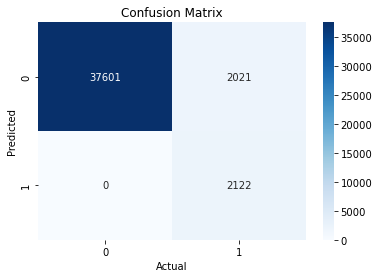

In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

# Introduce error in the DataFrame
df = introduce_error(df, error_order=10, data_percentage=10)

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Calculate mean and standard deviation for the first half
first_half_mean = np.mean(first_half['transactions'])
first_half_std_dev = np.std(first_half['transactions'])

# Assuming 'transactions' is the column containing transaction data
transactions = first_half['transactions']

# Convert 'date' column to datetime format
first_half['date'] = pd.to_datetime(first_half['date'])

# Convert datetime values to numerical representations (timestamps)
first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())

# Fit the KNN model using 'timestamp' and 'store_nbr' as features
X = first_half[['timestamp', 'store_nbr']].values
k = 5  # You can adjust the number of neighbors as needed
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X)
changed_count = 0
unchanged_count = 0
predicted_in_range = []
actual_error = []

# Function to process a single row as input
def process_input(row):
    global first_half, changed_count, unchanged_count, first_half_std_dev  # Specify global variables
    # Extract data from the row
    new_date = pd.to_datetime(row['date'])
    new_store_nbr = row['store_nbr']
    new_transaction_input = row['transactions']
    
    # Convert user input date to timestamp
    new_timestamp = new_date.timestamp()
    
    # Find the k nearest neighbors to the new data point
    new_data = np.array([[new_timestamp, new_store_nbr]])
    distances, indices = knn_model.kneighbors(new_data)
    
    # Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
    new_transaction_alternative = np.mean(transactions.iloc[indices[0]])
    
    # Calculate the range based on mean ± standard deviation of the alternative transaction value
    min_range = new_transaction_alternative - 2 * first_half_std_dev
    max_range = new_transaction_alternative + 2 * first_half_std_dev
    
    # Check if the user input transaction value falls within the range
    if min_range <= new_transaction_input <= max_range:
        changed_count += 1
        predicted_in_range.append(0)
    else:
        unchanged_count += 1
        predicted_in_range.append(1)
    actual_error.append(row['error'])

# Apply processing on the second half
for index, row in second_half.iterrows():
    process_input(row)

# Calculate evaluation metrics
accuracy = accuracy_score(actual_error, predicted_in_range)
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
f1 = f1_score(actual_error, predicted_in_range)

# Calculate specificity
tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
specificity = tn / (tn + fp)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)
print("Specificity:", specificity)
# Plot confusion matrix with predicted values on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(cm.T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_38503/2123544087.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['date'] = pd.to_datetime(first_half['date'])
/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_38503/2123544087.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())


Evaluation Metrics:
Accuracy: 0.9897949405902645
Balanced Accuracy: 0.9490064639693561
Precision: 1.0
Recall: 0.898012927938712
F1 Score: 0.9462663975782039
Specificity: 1.0


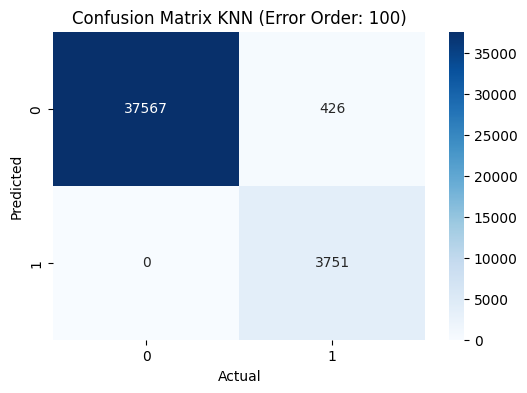

In [42]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df
error_order=100
# Introduce error in the DataFrame
df = introduce_error(df, error_order, data_percentage=10)

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Calculate mean and standard deviation for the first half
first_half_mean = np.mean(first_half['transactions'])
first_half_std_dev = np.std(first_half['transactions'])

# Assuming 'transactions' is the column containing transaction data
transactions = first_half['transactions']

# Convert 'date' column to datetime format
first_half['date'] = pd.to_datetime(first_half['date'])

# Convert datetime values to numerical representations (timestamps)
first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())

# Fit the KNN model using 'timestamp' and 'store_nbr' as features
X = first_half[['timestamp', 'store_nbr']].values
k = 5  # You can adjust the number of neighbors as needed
knn_model = NearestNeighbors(n_neighbors=k)
knn_model.fit(X)
changed_count = 0
unchanged_count = 0
predicted_in_range = []
actual_error = []

# Function to process a single row as input
def process_input(row):
    global first_half, changed_count, unchanged_count, first_half_std_dev  # Specify global variables
    # Extract data from the row
    new_date = pd.to_datetime(row['date'])
    new_store_nbr = row['store_nbr']
    new_transaction_input = row['transactions']
    
    # Convert user input date to timestamp
    new_timestamp = new_date.timestamp()
    
    # Find the k nearest neighbors to the new data point
    new_data = np.array([[new_timestamp, new_store_nbr]])
    distances, indices = knn_model.kneighbors(new_data)
    
    # Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
    new_transaction_alternative = np.mean(transactions.iloc[indices[0]])
    
    # Calculate the range based on mean ± standard deviation of the alternative transaction value
    min_range = new_transaction_alternative - first_half_std_dev
    max_range = new_transaction_alternative + first_half_std_dev
    
    # Check if the user input transaction value falls within the range
    if min_range <= new_transaction_input <= max_range:
        changed_count += 1
        predicted_in_range.append(0)
    else:
        unchanged_count += 1
        predicted_in_range.append(1)
    actual_error.append(row['error'])

# Apply processing on the second half
for index, row in second_half.iterrows():
    process_input(row)

# Calculate evaluation metrics
accuracy = accuracy_score(actual_error, predicted_in_range)
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
precision = precision_score(actual_error, predicted_in_range)
recall = recall_score(actual_error, predicted_in_range)
f1 = f1_score(actual_error, predicted_in_range)

# Calculate specificity
tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
specificity = tn / (tn + fp)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Plot confusion matrix with predicted values on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(actual_error, predicted_in_range).T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix KNN (Error Order: {error_order})')
plt.show()


In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Assuming 'transactions' is the column containing transaction data
transactions = df['transactions']

# Calculate mean and standard deviation
mean = np.mean(transactions)
std_dev = np.std(transactions)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Fit the Isolation Forest model using 'timestamp' and 'store_nbr' as features
X = df[['timestamp', 'store_nbr']].values
isolation_forest_model = IsolationForest(contamination=0.1)  # Adjust contamination as needed
isolation_forest_model.fit(X)

# Take user inputs
new_date = pd.to_datetime(input("Enter the date (YYYY-MM-DD): "))
new_store_nbr = int(input("Enter the store number: "))
new_transaction_input = float(input("Enter the transaction amount: "))

# Convert user input date to timestamp
new_timestamp = new_date.timestamp()

# Use Isolation Forest to predict anomaly for the new data point
new_data = np.array([[new_timestamp, new_store_nbr]])
anomaly_prediction = isolation_forest_model.predict(new_data)

# If the prediction is 1, it's not an anomaly; otherwise, it's an anomaly
if anomaly_prediction == 1:
    # Append a new row to the DataFrame
    new_row = {'date': new_date, 'store_nbr': new_store_nbr, 'transactions': new_transaction_input}
    df = df.append(new_row, ignore_index=True)
    print("User input transaction appended successfully.")
else:
    print("The user input transaction is flagged as an anomaly.")

# Optionally, you can save the updated DataFrame to a new CSV file
# df.to_csv('updated_transactions.csv', index=False)

print("Updated DataFrame:")
print(df)

Enter the date (YYYY-MM-DD): 2022-05-15
Enter the store number: 25
Enter the transaction amount: 3000
The user input transaction is flagged as an anomaly.
Updated DataFrame:
            date  store_nbr  transactions     timestamp
0     2013-01-01         25           770  1.356998e+09
1     2013-01-02          1          2111  1.357085e+09
2     2013-01-02          2          2358  1.357085e+09
3     2013-01-02          3          3487  1.357085e+09
4     2013-01-02          4          1922  1.357085e+09
...          ...        ...           ...           ...
83483 2017-08-15         50          2804  1.502755e+09
83484 2017-08-15         51          1573  1.502755e+09
83485 2017-08-15         52          2255  1.502755e+09
83486 2017-08-15         53           932  1.502755e+09
83487 2017-08-15         54           802  1.502755e+09

[83488 rows x 4 columns]


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Read the CSV file
try:
    df = pd.read_csv('transactions.csv')  # Check if the file path is correct
except FileNotFoundError:
    print("Error: File not found. Please provide the correct file path.")
    exit()

# Check if the column names exist in the DataFrame
if 'date' not in df.columns or 'store_nbr' not in df.columns or 'transactions' not in df.columns:
    print("Error: Column names not found in the DataFrame.")
    exit()

# Calculate mean and standard deviation
mean = np.mean(df['transactions'])
std_dev = np.std(df['transactions'])

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Fit the Isolation Forest model using 'timestamp' and 'store_nbr' as features
X = df[['timestamp', 'store_nbr']].values
isolation_forest_model = IsolationForest(contamination=0.1)  # Adjust contamination as needed
isolation_forest_model.fit(X)

# Take user inputs with error handling
try:
    new_date = pd.to_datetime(input("Enter the date (YYYY-MM-DD): "))
    new_store_nbr = int(input("Enter the store number: "))
    new_transaction_input = float(input("Enter the transaction amount: "))
except ValueError:
    print("Error: Invalid input. Please enter a valid date, store number, and transaction amount.")
    exit()

# Convert user input date to timestamp
new_timestamp = new_date.timestamp()

# Use Isolation Forest to predict anomaly for the new data point
new_data = np.array([[new_timestamp, new_store_nbr]])
anomaly_prediction = isolation_forest_model.predict(new_data)

# If the prediction is 1, it's not an anomaly; otherwise, it's an anomaly
if anomaly_prediction == 1:
    # Append a new row to the DataFrame
    new_row = {'date': new_date, 'store_nbr': new_store_nbr, 'transactions': new_transaction_input}
    df = df.append(new_row, ignore_index=True)
    print("User input transaction appended successfully.")
else:
    print("The user input transaction is flagged as an anomaly.")

# Optionally, you can save the updated DataFrame to a new CSV file
# df.to_csv('updated_transactions.csv', index=False)

print("Updated DataFrame:")
print(df)



Enter the date (YYYY-MM-DD): 2022-12-23
Enter the store number: 23
Enter the transaction amount: 200
The user input transaction is flagged as an anomaly.
Updated DataFrame:
            date  store_nbr  transactions     timestamp
0     2013-01-01         25           770  1.356998e+09
1     2013-01-02          1          2111  1.357085e+09
2     2013-01-02          2          2358  1.357085e+09
3     2013-01-02          3          3487  1.357085e+09
4     2013-01-02          4          1922  1.357085e+09
...          ...        ...           ...           ...
83483 2017-08-15         50          2804  1.502755e+09
83484 2017-08-15         51          1573  1.502755e+09
83485 2017-08-15         52          2255  1.502755e+09
83486 2017-08-15         53           932  1.502755e+09
83487 2017-08-15         54           802  1.502755e+09

[83488 rows x 4 columns]


Evaluation Metrics:
Accuracy: 0.8337485626676888
Balanced Accuracy: 0.9074766805335533
Precision: 0.376829815895824
Recall: 0.9997617345723135
F1 Score: 0.5473519436472737
Specificity: 0.8151916264947932


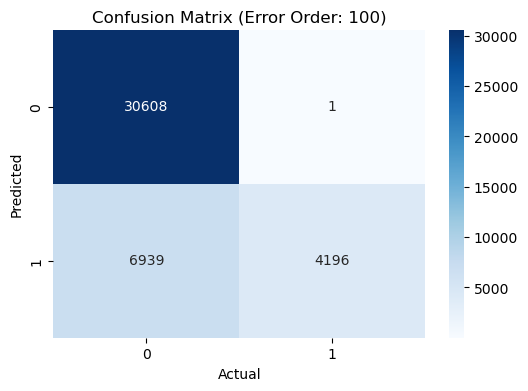

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

error_order = 100
# Introduce error in the DataFrame
df = introduce_error(df, error_order, data_percentage=10)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Fit the Isolation Forest model using all available features
features = ['timestamp', 'store_nbr', 'transactions']  # Features used for training
X_train = first_half[features]
isolation_forest_model = IsolationForest(contamination=0.1)  # Adjust contamination as needed
isolation_forest_model.fit(X_train)

# Predict anomalies for the second half
predicted_labels = isolation_forest_model.predict(second_half[features])

# Convert predicted labels to binary (0 for inliers, 1 for outliers)
predicted_in_range = np.where(predicted_labels == 1, 0, 1)

# Calculate evaluation metrics
actual_error = second_half['error']
accuracy = accuracy_score(actual_error, predicted_in_range)
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
precision = precision_score(actual_error, predicted_in_range)
recall = recall_score(actual_error, predicted_in_range)
f1 = f1_score(actual_error, predicted_in_range)

# Calculate specificity
tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
specificity = tn / (tn + fp)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Plot confusion matrix with predicted values on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(actual_error, predicted_in_range).T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix (Error Order: {error_order})')
plt.show()


Evaluation Metrics:
Accuracy: 0.9558020314296666
Balanced Accuracy: 0.9755142667551426
Precision: 0.6880284071694285
Recall: 1.0
F1 Score: 0.8151858158870079
Specificity: 0.9510285335102854


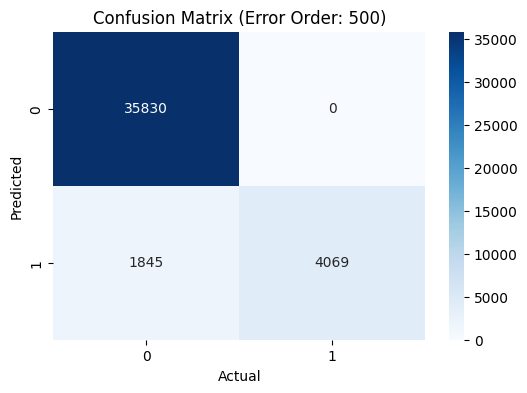

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

error_order = 500
# Introduce error in the DataFrame
df = introduce_error(df, error_order, data_percentage=10)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Fit the Isolation Forest model using all available features
features = ['timestamp', 'store_nbr', 'transactions']  # Features used for training
X_train = first_half[features]
isolation_forest_model = IsolationForest(contamination=0.1, n_estimators=30, max_samples='auto', max_features=1.0, bootstrap=True)  
# Adjust other parameters as needed
isolation_forest_model.fit(X_train)

# Predict anomalies for the second half
predicted_labels = isolation_forest_model.predict(second_half[features])

# Convert predicted labels to binary (0 for inliers, 1 for outliers)
predicted_in_range = np.where(predicted_labels == 1, 0, 1)

# Calculate evaluation metrics
actual_error = second_half['error']
accuracy = accuracy_score(actual_error, predicted_in_range)
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
precision = precision_score(actual_error, predicted_in_range)
recall = recall_score(actual_error, predicted_in_range)
f1 = f1_score(actual_error, predicted_in_range)

# Calculate specificity
tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
specificity = tn / (tn + fp)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Plot confusion matrix with predicted values on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(actual_error, predicted_in_range).T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix (Error Order: {error_order})')
plt.show()


Evaluation Metrics:
Accuracy: 0.10080490609428899
Balanced Accuracy: 0.5
Precision: 0.10080490609428899
Recall: 1.0
F1 Score: 0.18314763231197773
Specificity: 0.0


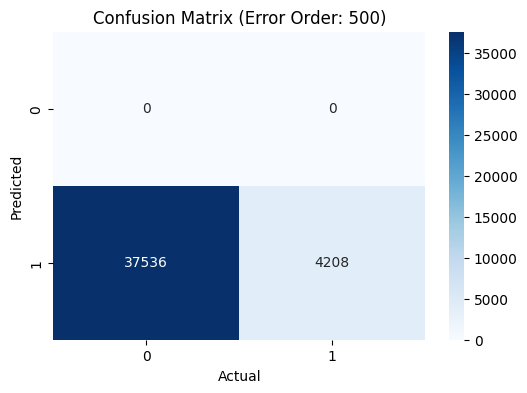

In [12]:
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

error_order = 500
# Introduce error in the DataFrame
df = introduce_error(df, error_order, data_percentage=10)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Fit the One-Class SVM model using all available features
features = ['timestamp', 'store_nbr']  # Features used for training
X_train = first_half[features]
one_class_svm_model = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')  
# Adjust nu parameter as needed, it controls the proportion of outliers
one_class_svm_model.fit(X_train)

# Predict anomalies for the second half
predicted_labels = one_class_svm_model.predict(second_half[features])

# Convert predicted labels to binary (0 for inliers, 1 for outliers)
predicted_in_range = np.where(predicted_labels == 1, 0, 1)

# Calculate evaluation metrics
actual_error = second_half['error']
accuracy = accuracy_score(actual_error, predicted_in_range)
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
precision = precision_score(actual_error, predicted_in_range)
recall = recall_score(actual_error, predicted_in_range)
f1 = f1_score(actual_error, predicted_in_range)

# Calculate specificity
tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
specificity = tn / (tn + fp)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Plot confusion matrix with predicted values on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(actual_error, predicted_in_range).T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix (Error Order: {error_order})')
plt.show()

Evaluation Metrics:
Accuracy: 0.9503401686469912
Balanced Accuracy: 0.8629179006036464
Precision: 0.7475449101796408
Recall: 0.753864734299517
F1 Score: 0.7506915213469633
Specificity: 0.9719710669077758


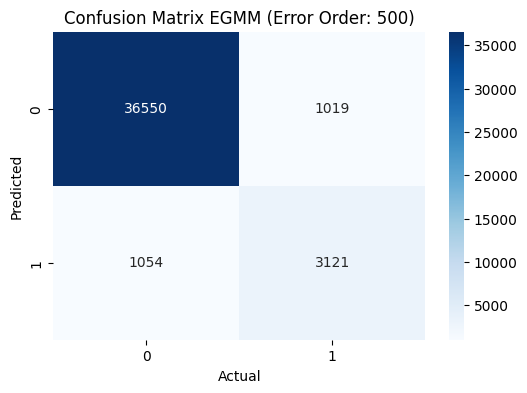

In [49]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

error_order = 500
# Introduce error in the DataFrame
df = introduce_error(df, error_order, data_percentage=10)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Fit the Gaussian Mixture Model (EGMM) using all available features
features = ['timestamp', 'store_nbr', 'transactions']  # Features used for training
X_train = first_half[features]
egmm_model = GaussianMixture(n_components=3, covariance_type='full', random_state=42)  # Example: 3 components
egmm_model.fit(X_train)

# Calculate the probability densities for each sample
densities = egmm_model.score_samples(second_half[features])

# Set a threshold for anomaly detection (e.g., below a certain percentile)
threshold = np.percentile(densities, 10)  # Example: 10th percentile

# Predict anomalies for the second half
predicted_in_range = (densities < threshold).astype(int)

# Calculate evaluation metrics
actual_error = second_half['error']
accuracy = accuracy_score(actual_error, predicted_in_range)
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
precision = precision_score(actual_error, predicted_in_range)
recall = recall_score(actual_error, predicted_in_range)
f1 = f1_score(actual_error, predicted_in_range)

# Calculate specificity
tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
specificity = tn / (tn + fp)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Plot confusion matrix with predicted values on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(actual_error, predicted_in_range).T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix EGMM (Error Order: {error_order})')
plt.show()


Evaluation Metrics:
Accuracy: 0.8242382138750479
Balanced Accuracy: 0.5111741882322176
Precision: 0.11976047904191617
Recall: 0.12013455069678039
F1 Score: 0.11994722322178242
Specificity: 0.9022138257676547


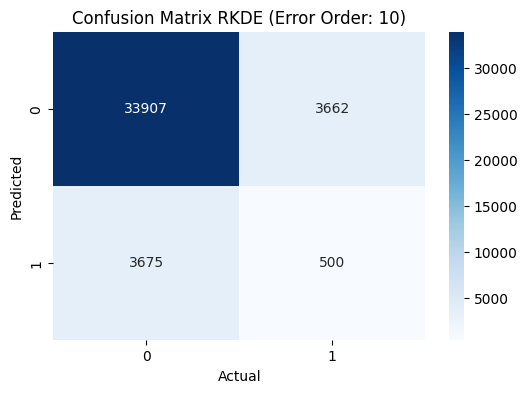

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_density import KDEMultivariate

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

error_order = 10
# Introduce error in the DataFrame
df = introduce_error(df, error_order, data_percentage=10)

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Convert datetime values to numerical representations (timestamps)
df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Divide the DataFrame into two parts
total_rows = len(df)
split_index = total_rows // 2
first_half = df.iloc[:split_index]
second_half = df.iloc[split_index:]

# Fit the RKDE model using all available features
features = ['timestamp', 'store_nbr', 'transactions']  # Features used for training
X_train = first_half[features].values
rkde_model = KDEMultivariate(data=X_train, var_type='ccc', bw='normal_reference')

# Calculate the probability densities for the second half
densities = rkde_model.pdf(second_half[features].values)

# Set a threshold for anomaly detection (e.g., below a certain percentile)
threshold = np.percentile(densities, 10)  # Example: 10th percentile

# Predict anomalies for the second half
predicted_in_range = (densities < threshold).astype(int)

# Calculate evaluation metrics
actual_error = second_half['error']
accuracy = accuracy_score(actual_error, predicted_in_range)
balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
precision = precision_score(actual_error, predicted_in_range)
recall = recall_score(actual_error, predicted_in_range)
f1 = f1_score(actual_error, predicted_in_range)

# Calculate specificity
tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
specificity = tn / (tn + fp)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

# Plot confusion matrix with predicted values on the y-axis
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(actual_error, predicted_in_range).T, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Confusion Matrix RKDE (Error Order: {error_order})')
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

# Function to evaluate KNN model
def evaluate_knn(df, error_order):
    # Introduce error in the DataFrame
    df = introduce_error(df.copy(), error_order, data_percentage=10)

    # Divide the DataFrame into two parts
    total_rows = len(df)
    split_index = total_rows // 2
    first_half = df.iloc[:split_index]
    second_half = df.iloc[split_index:]

    # Calculate mean and standard deviation for the first half
    first_half_mean = np.mean(first_half['transactions'])
    first_half_std_dev = np.std(first_half['transactions'])

    # Assuming 'transactions' is the column containing transaction data
    transactions = first_half['transactions']

    # Convert 'date' column to datetime format
    first_half['date'] = pd.to_datetime(first_half['date'])

    # Convert datetime values to numerical representations (timestamps)
    first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())

    # Fit the KNN model using 'timestamp' and 'store_nbr' as features
    X = first_half[['timestamp', 'store_nbr']].values
    k = 5  # You can adjust the number of neighbors as needed
    knn_model = NearestNeighbors(n_neighbors=k)
    knn_model.fit(X)
    changed_count = 0
    unchanged_count = 0
    predicted_in_range = []
    actual_error = []

    # Function to process a single row as input
    def process_input(row):
        nonlocal changed_count, unchanged_count, first_half_std_dev
        # Extract data from the row
        new_date = pd.to_datetime(row['date'])
        new_store_nbr = row['store_nbr']
        new_transaction_input = row['transactions']

        # Convert user input date to timestamp
        new_timestamp = new_date.timestamp()

        # Find the k nearest neighbors to the new data point
        new_data = np.array([[new_timestamp, new_store_nbr]])
        distances, indices = knn_model.kneighbors(new_data)

        # Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
        new_transaction_alternative = np.mean(transactions.iloc[indices[0]])

        # Calculate the range based on mean ± standard deviation of the alternative transaction value
        min_range = new_transaction_alternative - first_half_std_dev
        max_range = new_transaction_alternative + first_half_std_dev

        # Check if the user input transaction value falls within the range
        if min_range <= new_transaction_input <= max_range:
            changed_count += 1
            predicted_in_range.append(0)
        else:
            unchanged_count += 1
            predicted_in_range.append(1)
        actual_error.append(row['error'])

    # Apply processing on the second half
    for _, row in second_half.iterrows():
        process_input(row)

    # Calculate evaluation metrics
    accuracy = accuracy_score(actual_error, predicted_in_range)
    balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
    precision = precision_score(actual_error, predicted_in_range)
    recall = recall_score(actual_error, predicted_in_range)
    f1 = f1_score(actual_error, predicted_in_range)

    # Calculate specificity
    tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
    specificity = tn / (tn + fp)

    return accuracy, balanced_accuracy, precision, recall, f1, specificity

# Function to evaluate Isolation Forest model
def evaluate_isolation_forest(df, error_order):
    # Introduce error in the DataFrame
    df = introduce_error(df.copy(), error_order, data_percentage=10)

    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Convert datetime values to numerical representations (timestamps)
    df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

    # Divide the DataFrame into two parts
    total_rows = len(df)
    split_index = total_rows // 2
    first_half = df.iloc[:split_index]
    second_half = df.iloc[split_index:]

    # Fit the Isolation Forest model using all available features
    features = ['timestamp', 'store_nbr', 'transactions']  # Features used for training
    X_train = first_half[features]
    isolation_forest_model = IsolationForest(contamination=0.1, n_estimators=30, max_samples='auto', max_features=1.0, bootstrap=True)  
    # Adjust other parameters as needed
    isolation_forest_model.fit(X_train)

    # Predict anomalies for the second half
    predicted_labels = isolation_forest_model.predict(second_half[features])

    # Convert predicted labels to binary (0 for inliers, 1 for outliers)
    predicted_in_range = np.where(predicted_labels == 1, 0, 1)

    # Calculate evaluation metrics
    actual_error = second_half['error']
    accuracy = accuracy_score(actual_error, predicted_in_range)
    balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
    precision = precision_score(actual_error, predicted_in_range)
    recall = recall_score(actual_error, predicted_in_range)
    f1 = f1_score(actual_error, predicted_in_range)

    # Calculate specificity
    tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
    specificity = tn / (tn + fp)

    return accuracy, balanced_accuracy, precision, recall, f1, specificity

# Number of iterations
num_iterations = 10

# Lists to store scores
knn_scores = []
isolation_forest_scores = []

# Run evaluation for KNN and Isolation Forest for multiple iterations
for i in range(num_iterations):
    knn_scores.append(evaluate_knn(df, error_order=100))
    isolation_forest_scores.append(evaluate_isolation_forest(df, error_order=500))

# Convert lists to arrays for easier manipulation
knn_scores = np.array(knn_scores)
isolation_forest_scores = np.array(isolation_forest_scores)

# Calculate average scores for KNN
avg_accuracy_knn = np.mean(knn_scores[:, 0])
avg_balanced_accuracy_knn = np.mean(knn_scores[:, 1])
avg_precision_knn = np.mean(knn_scores[:, 2])
avg_recall_knn = np.mean(knn_scores[:, 3])
avg_f1_knn = np.mean(knn_scores[:, 4])
avg_specificity_knn = np.mean(knn_scores[:, 5])

# Calculate average scores for Isolation Forest
avg_accuracy_isolation = np.mean(isolation_forest_scores[:, 0])
avg_balanced_accuracy_isolation = np.mean(isolation_forest_scores[:, 1])
avg_precision_isolation = np.mean(isolation_forest_scores[:, 2])
avg_recall_isolation = np.mean(isolation_forest_scores[:, 3])
avg_f1_isolation = np.mean(isolation_forest_scores[:, 4])
avg_specificity_isolation = np.mean(isolation_forest_scores[:, 5])

# Compare average scores
print("Comparison of Average Evaluation Metrics:")
print("KNN vs Isolation Forest")
print("Average Accuracy:", avg_accuracy_knn, "vs", avg_accuracy_isolation)
print("Average Balanced Accuracy:", avg_balanced_accuracy_knn, "vs", avg_balanced_accuracy_isolation)
print("Average Precision:", avg_precision_knn, "vs", avg_precision_isolation)
print("Average Recall:", avg_recall_knn, "vs", avg_recall_isolation)
print("Average F1 Score:", avg_f1_knn, "vs", avg_f1_isolation)
print("Average Specificity:", avg_specificity_knn, "vs", avg_specificity_isolation)



/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_49853/1223342408.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['date'] = pd.to_datetime(first_half['date'])
/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_49853/1223342408.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())
/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_49853/1223342408.py:46: SettingWithCopyWarning: 
A value is try

Comparison of Average Evaluation Metrics:
KNN vs Isolation Forest
Average Accuracy: 0.92822441548486 vs 0.9217037178995783
Average Balanced Accuracy: 0.9080757828045674 vs 0.9564510161528921
Average Precision: 0.8679276596768378 vs 0.6200014179730502
Average Recall: 0.8829252317797843 vs 0.9999050827402114
Average F1 Score: 0.8502520832703844 vs 0.7495443746035105
Average Specificity: 0.9332263338293506 vs 0.9129969495655731


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

# Function to evaluate KNN model
def evaluate_knn(df, error_order):
    # Introduce error in the DataFrame
    df = introduce_error(df.copy(), error_order, data_percentage=10)

    # Divide the DataFrame into two parts
    total_rows = len(df)
    split_index = total_rows // 2
    first_half = df.iloc[:split_index]
    second_half = df.iloc[split_index:]

    # Calculate mean and standard deviation for the first half
    first_half_mean = np.mean(first_half['transactions'])
    first_half_std_dev = np.std(first_half['transactions'])

    # Assuming 'transactions' is the column containing transaction data
    transactions = first_half['transactions']

    # Convert 'date' column to datetime format
    first_half['date'] = pd.to_datetime(first_half['date'])

    # Convert datetime values to numerical representations (timestamps)
    first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())

    # Fit the KNN model using 'timestamp' and 'store_nbr' as features
    X = first_half[['timestamp', 'store_nbr']].values
    k = 5  # You can adjust the number of neighbors as needed
    knn_model = NearestNeighbors(n_neighbors=k)
    knn_model.fit(X)
    changed_count = 0
    unchanged_count = 0
    predicted_in_range = []
    actual_error = []

    # Function to process a single row as input
    def process_input(row):
        nonlocal changed_count, unchanged_count, first_half_std_dev
        # Extract data from the row
        new_date = pd.to_datetime(row['date'])
        new_store_nbr = row['store_nbr']
        new_transaction_input = row['transactions']

        # Convert user input date to timestamp
        new_timestamp = new_date.timestamp()

        # Find the k nearest neighbors to the new data point
        new_data = np.array([[new_timestamp, new_store_nbr]])
        distances, indices = knn_model.kneighbors(new_data)

        # Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
        new_transaction_alternative = np.mean(transactions.iloc[indices[0]])

        # Calculate the range based on mean ± standard deviation of the alternative transaction value
        min_range = new_transaction_alternative - first_half_std_dev
        max_range = new_transaction_alternative + first_half_std_dev

        # Check if the user input transaction value falls within the range
        if min_range <= new_transaction_input <= max_range:
            changed_count += 1
            predicted_in_range.append(0)
        else:
            unchanged_count += 1
            predicted_in_range.append(1)
        actual_error.append(row['error'])

    # Apply processing on the second half
    for _, row in second_half.iterrows():
        process_input(row)

    # Calculate evaluation metrics
    accuracy = accuracy_score(actual_error, predicted_in_range)
    balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
    precision = precision_score(actual_error, predicted_in_range)
    recall = recall_score(actual_error, predicted_in_range)
    f1 = f1_score(actual_error, predicted_in_range)

    # Calculate specificity
    tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
    specificity = tn / (tn + fp)

    return accuracy, balanced_accuracy, precision, recall, f1, specificity

# Function to evaluate Isolation Forest model
def evaluate_isolation_forest(df, error_order):
    # Introduce error in the DataFrame
    df = introduce_error(df.copy(), error_order, data_percentage=10)

    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Convert datetime values to numerical representations (timestamps)
    df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

    # Divide the DataFrame into two parts
    total_rows = len(df)
    split_index = total_rows // 2
    first_half = df.iloc[:split_index]
    second_half = df.iloc[split_index:]

    # Fit the Isolation Forest model using all available features
    features = ['timestamp', 'store_nbr', 'transactions']  # Features used for training
    X_train = first_half[features]
    isolation_forest_model = IsolationForest(contamination=0.1, n_estimators=30, max_samples='auto', max_features=1.0, bootstrap=True)  
    # Adjust other parameters as needed
    isolation_forest_model.fit(X_train)

    # Predict anomalies for the second half
    predicted_labels = isolation_forest_model.predict(second_half[features])

    # Convert predicted labels to binary (0 for inliers, 1 for outliers)
    predicted_in_range = np.where(predicted_labels == 1, 0, 1)

    # Calculate evaluation metrics
    actual_error = second_half['error']
    accuracy = accuracy_score(actual_error, predicted_in_range)
    balanced_accuracy = balanced_accuracy_score(actual_error, predicted_in_range)
    precision = precision_score(actual_error, predicted_in_range)
    recall = recall_score(actual_error, predicted_in_range)
    f1 = f1_score(actual_error, predicted_in_range)

    # Calculate specificity
    tn, fp, _, _ = confusion_matrix(actual_error, predicted_in_range).ravel()
    specificity = tn / (tn + fp)

    return accuracy, balanced_accuracy, precision, recall, f1, specificity

# Function to plot bar plots for evaluation metrics
def plot_evaluation_metrics(knn_scores, isolation_forest_scores):
    # Evaluation metric names
    metric_names = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']

    # Calculate average scores for KNN
    knn_avg_scores = np.mean(knn_scores, axis=0)

    # Calculate average scores for Isolation Forest
    isolation_avg_scores = np.mean(isolation_forest_scores, axis=0)

    # Plot bar plots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Comparison of Evaluation Metrics: KNN vs Isolation Forest')

    for i, ax in enumerate(axes.flat):
        ax.bar(['KNN', 'Isolation Forest'], [knn_avg_scores[i], isolation_avg_scores[i]], color=['blue', 'green'])
        ax.set_title(metric_names[i])
        ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()

# Number of iterations
num_iterations = 10

# Lists to store scores
knn_scores = []
isolation_forest_scores = []

# Run evaluation for KNN and Isolation Forest for multiple iterations
for i in range(num_iterations):
    knn_scores.append(evaluate_knn(df, error_order=100))
    isolation_forest_scores.append(evaluate_isolation_forest(df, error_order=500))

# Convert lists to arrays for easier manipulation
knn_scores = np.array(knn_scores)
isolation_forest_scores = np.array(isolation_forest_scores)

# Compare average scores
avg_accuracy_knn = np.mean(knn_scores[:, 0])
avg_balanced_accuracy_knn = np.mean(knn_scores[:, 1])
avg_precision_knn = np.mean(knn_scores[:, 2])
avg_recall_knn = np.mean(knn_scores[:, 3])
avg_f1_knn = np.mean(knn_scores[:, 4])
avg_specificity_knn = np.mean(knn_scores[:, 5])

avg_accuracy_isolation = np.mean(isolation_forest_scores[:, 0])
avg_balanced_accuracy_isolation = np.mean(isolation_forest_scores[:, 1])
avg_precision_isolation = np.mean(isolation_forest_scores[:, 2])
avg_recall_isolation = np.mean(isolation_forest_scores[:, 3])
avg_f1_isolation = np.mean(isolation_forest_scores[:, 4])
avg_specificity_isolation = np.mean(isolation_forest_scores[:, 5])

print("Comparison of Average Evaluation Metrics:")
print("KNN vs Isolation Forest")
print("Average Accuracy:", avg_accuracy_knn, "vs", avg_accuracy_isolation)
print("Average Balanced Accuracy:", avg_balanced_accuracy_knn, "vs", avg_balanced_accuracy_isolation)
print("Average Precision:", avg_precision_knn, "vs", avg_precision_isolation)
print("Average Recall:", avg_recall_knn, "vs", avg_recall_isolation)
print("Average F1 Score:", avg_f1_knn, "vs", avg_f1_isolation)
print("Average Specificity:", avg_specificity_knn, "vs", avg_specificity_isolation)

# Plot bar plots for evaluation metrics
plot_evaluation_metrics(knn_scores[:, :6], isolation_forest_scores[:, :6])



/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_49853/1973582164.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_49853/1973582164.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['date'].apply(lambda x: x.timestamp())


NameError: name 'actual_error_isolation_fore' is not defined

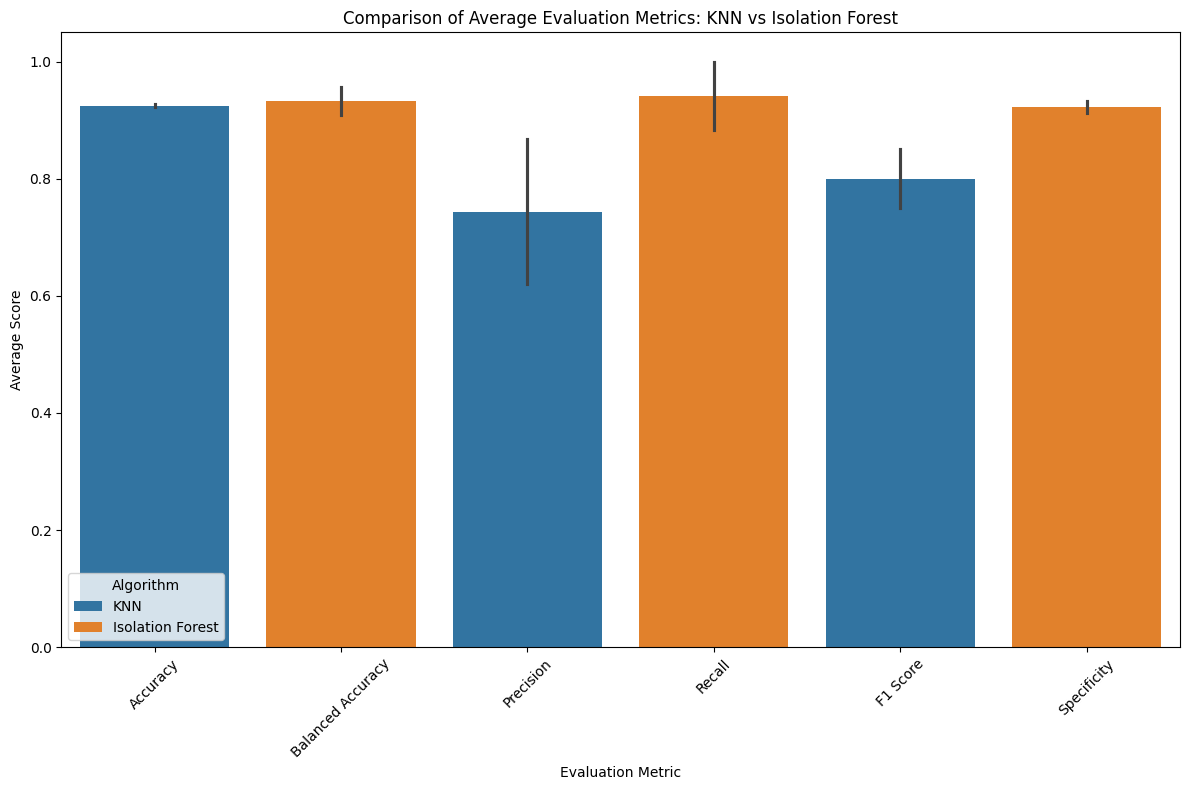

In [8]:
# Define evaluation metric names
metric_names = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']

# Calculate average scores for both algorithms
avg_scores_knn = [avg_accuracy_knn, avg_balanced_accuracy_knn, avg_precision_knn, avg_recall_knn, avg_f1_knn, avg_specificity_knn]
avg_scores_isolation = [avg_accuracy_isolation, avg_balanced_accuracy_isolation, avg_precision_isolation, avg_recall_isolation, avg_f1_isolation, avg_specificity_isolation]

# Create a DataFrame for easier plotting
df_avg_scores = pd.DataFrame({'Algorithm': ['KNN', 'Isolation Forest'] * len(metric_names),
                              'Metric': metric_names * 2,
                              'Average Score': avg_scores_knn + avg_scores_isolation})

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Average Score', hue='Algorithm', data=df_avg_scores)
plt.title('Comparison of Average Evaluation Metrics: KNN vs Isolation Forest')
plt.xlabel('Evaluation Metric')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()


/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_49853/3246791560.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['date'] = pd.to_datetime(first_half['date'])
/var/folders/ww/qjh9zpks52d4vsjxc4bg379h0000gn/T/ipykernel_49853/3246791560.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())


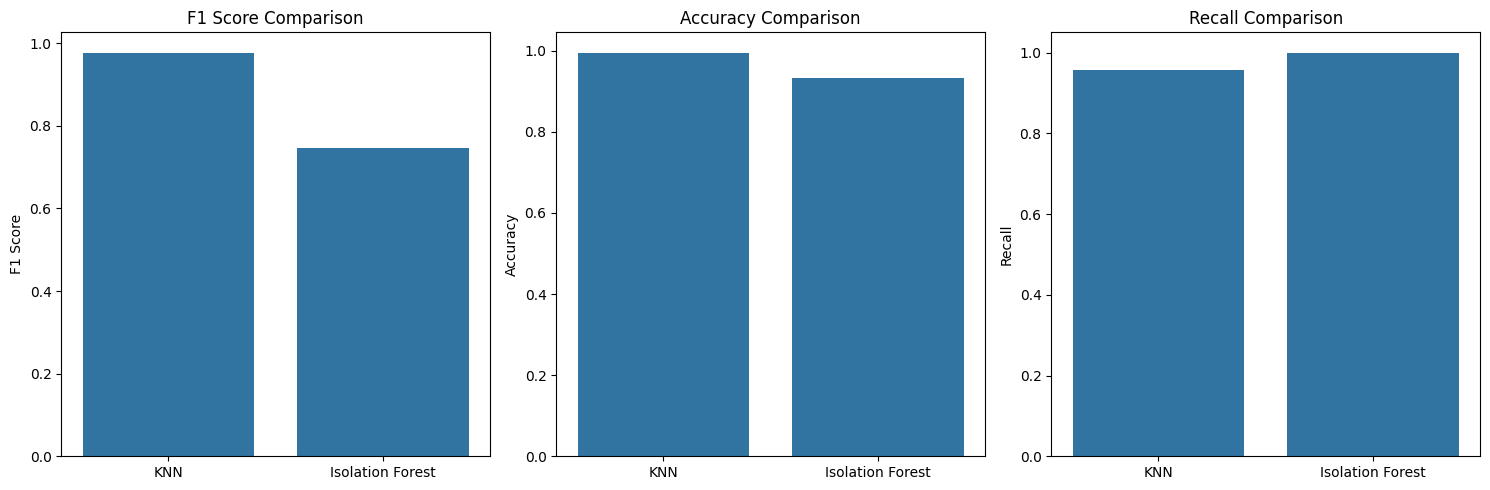

In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('transactions.csv')

# Function to introduce error in a subset of data
def introduce_error(df, error_order, data_percentage):
    # Randomly select a percentage of the data
    sample_size = int(len(df) * data_percentage / 100)
    sample_indices = np.random.choice(df.index, size=sample_size, replace=False)
    
    # Introduce error by multiplying the transaction values
    df.loc[sample_indices, 'transactions'] *= error_order
    
    # Add a column to indicate error status
    df['error'] = 0
    df.loc[sample_indices, 'error'] = 1
    
    return df

# Function to evaluate KNN model
def evaluate_knn(df, error_order):
    # Divide the DataFrame into two parts
    total_rows = len(df)
    split_index = total_rows // 2
    first_half = df.iloc[:split_index]
    second_half = df.iloc[split_index:]

    # Assuming 'transactions' is the column containing transaction data
    transactions = first_half['transactions']

    # Convert 'date' column to datetime format
    first_half['date'] = pd.to_datetime(first_half['date'])

    # Convert datetime values to numerical representations (timestamps)
    first_half['timestamp'] = first_half['date'].apply(lambda x: x.timestamp())

    # Fit the KNN model using 'timestamp' and 'store_nbr' as features
    X = first_half[['timestamp', 'store_nbr']].values
    k = 5  # You can adjust the number of neighbors as needed
    knn_model = NearestNeighbors(n_neighbors=k)
    knn_model.fit(X)

    predicted_in_range = []
    actual_error = []

    # Function to process a single row as input
    def process_input(row):
        nonlocal first_half
        # Extract data from the row
        new_date = pd.to_datetime(row['date'])
        new_store_nbr = row['store_nbr']
        new_transaction_input = row['transactions']

        # Convert user input date to timestamp
        new_timestamp = new_date.timestamp()

        # Find the k nearest neighbors to the new data point
        new_data = np.array([[new_timestamp, new_store_nbr]])
        distances, indices = knn_model.kneighbors(new_data)

        # Generate an alternative new transaction value using the mean of the nearest neighbors' transactions
        new_transaction_alternative = np.mean(transactions.iloc[indices[0]])

        # Calculate the range based on mean ± standard deviation of the alternative transaction value
        first_half_std_dev = np.std(transactions)
        min_range = new_transaction_alternative - first_half_std_dev
        max_range = new_transaction_alternative + first_half_std_dev

        # Check if the user input transaction value falls within the range
        if min_range <= new_transaction_input <= max_range:
            predicted_in_range.append(0)
        else:
            predicted_in_range.append(1)
        actual_error.append(row['error'])

    # Apply processing on the second half
    for _, row in second_half.iterrows():
        process_input(row)

    # Calculate evaluation metrics
    accuracy = accuracy_score(actual_error, predicted_in_range)
    recall = recall_score(actual_error, predicted_in_range)
    f1 = f1_score(actual_error, predicted_in_range)

    return accuracy, recall, f1

# Function to evaluate Isolation Forest model
def evaluate_isolation_forest(df, error_order):
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Convert datetime values to numerical representations (timestamps)
    df['timestamp'] = df['date'].apply(lambda x: x.timestamp())

    # Divide the DataFrame into two parts
    total_rows = len(df)
    split_index = total_rows // 2
    first_half = df.iloc[:split_index]
    second_half = df.iloc[split_index:]

    # Fit the Isolation Forest model using all available features
    features = ['timestamp', 'store_nbr', 'transactions']  # Features used for training
    X_train = first_half[features]
    isolation_forest_model = IsolationForest(contamination=0.1, n_estimators=30, max_samples='auto', max_features=1.0, bootstrap=True)  
    # Adjust other parameters as needed
    isolation_forest_model.fit(X_train)

    # Predict anomalies for the second half
    predicted_labels = isolation_forest_model.predict(second_half[features])

    # Convert predicted labels to binary (0 for inliers, 1 for outliers)
    predicted_in_range = np.where(predicted_labels == 1, 0, 1)

    # Calculate evaluation metrics
    actual_error = second_half['error']
    accuracy = accuracy_score(actual_error, predicted_in_range)
    recall = recall_score(actual_error, predicted_in_range)
    f1 = f1_score(actual_error, predicted_in_range)

    return accuracy, recall, f1

# Introduce error only once
df_with_error = introduce_error(df.copy(), error_order=100, data_percentage=10)

# Evaluate both algorithms on the same data
accuracy_knn, recall_knn, f1_knn = evaluate_knn(df_with_error, error_order=100)
accuracy_isolation, recall_isolation, f1_isolation = evaluate_isolation_forest(df_with_error, error_order=100)

# Plot F1 Score, Accuracy, and Recall for both algorithms
plt.figure(figsize=(15, 5))

# F1 Score
plt.subplot(1, 3, 1)
sns.barplot(x=['KNN', 'Isolation Forest'], y=[f1_knn, f1_isolation])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

# Accuracy
plt.subplot(1, 3, 2)
sns.barplot(x=['KNN', 'Isolation Forest'], y=[accuracy_knn, accuracy_isolation])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

# Recall
plt.subplot(1, 3, 3)
sns.barplot(x=['KNN', 'Isolation Forest'], y=[recall_knn, recall_isolation])
plt.title('Recall Comparison')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()
